## Randall Mencias
## Juan Francisco Cisneros
## Josue Cardenas

### DESCRIPCION DEL PROYECTO
- ....

#### Librerias

In [62]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import transformers
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

import xgboost as xgb



### ANALISIS EXPLORATORIO DE DATOS

In [13]:
# Where data is stored
pathTest = "../Medicine_Recomendation/data/test.csv"
pathTrain = "../Medicine_Recomendation/data/train.csv"

# Read data
dfTest = pd.read_csv(pathTest)
dfTrain = pd.read_csv(pathTrain)

# Size of the train and test data
print("Train data size: ", dfTrain.shape)
print("Test data size: ", dfTest.shape)

Train data size:  (161297, 7)
Test data size:  (53200, 7)


In [14]:
dfTrain.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2003-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [15]:
dfTest.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
2,15,Medroxyprogesterone,Birth Control,"""I&#039;m 24 and I&#039;ve been on this for ab...",9,16-Oct-15,7
3,17,Medroxyprogesterone,Endometriosis,"""I loved how convenient this was, one shot eve...",3,15-Oct-15,4
4,19,Medroxyprogesterone,Birth Control,"""I took this shot to be safe, I&#039;m a young...",7,14-Oct-15,5


#### Plot Columns

In [17]:
print("Test data shape, Rows and Columns: ", dfTest.shape)
print("Train data shape, Rows and Columns: ", dfTrain.shape)
print()
print("Test data columns: ", dfTest.columns)
print("Train data columns: ", dfTrain.columns)

Test data shape, Rows and Columns:  (53200, 7)
Train data shape, Rows and Columns:  (161297, 7)

Test data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Train data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [18]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [19]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53200 entries, 0 to 53199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53200 non-null  int64 
 1   drugName     53200 non-null  object
 2   condition    53200 non-null  object
 3   review       53200 non-null  object
 4   rating       53200 non-null  int64 
 5   date         53200 non-null  object
 6   usefulCount  53200 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.8+ MB


In [20]:
dfTrain.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [21]:
# Check for missing values
dfTrain.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [22]:
# Drop all rows with missing values
dfTrain.dropna(inplace=True)
dfTrain.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [23]:
dfTest.describe()

,uniqueID,rating,usefulCount
count,53200.000000,53200.000000,53200.000000
mean,116465.986485,6.978289,28.170282
std,67001.804385,3.286389,36.284596
min,0.000000,1.000000,0.000000
25%,58371.500000,4.000000,6.000000
50%,116418.500000,8.000000,16.000000
75%,174645.250000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [24]:
# Check for missing values
dfTest.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [25]:
print("Test data shape, Rows and Columns: ", dfTest.shape)
print("Train data shape, Rows and Columns: ", dfTrain.shape)

Test data shape, Rows and Columns:  (53200, 7)
Train data shape, Rows and Columns:  (160398, 7)


In [26]:
dfAll = pd.concat([dfTrain,dfTest])


Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

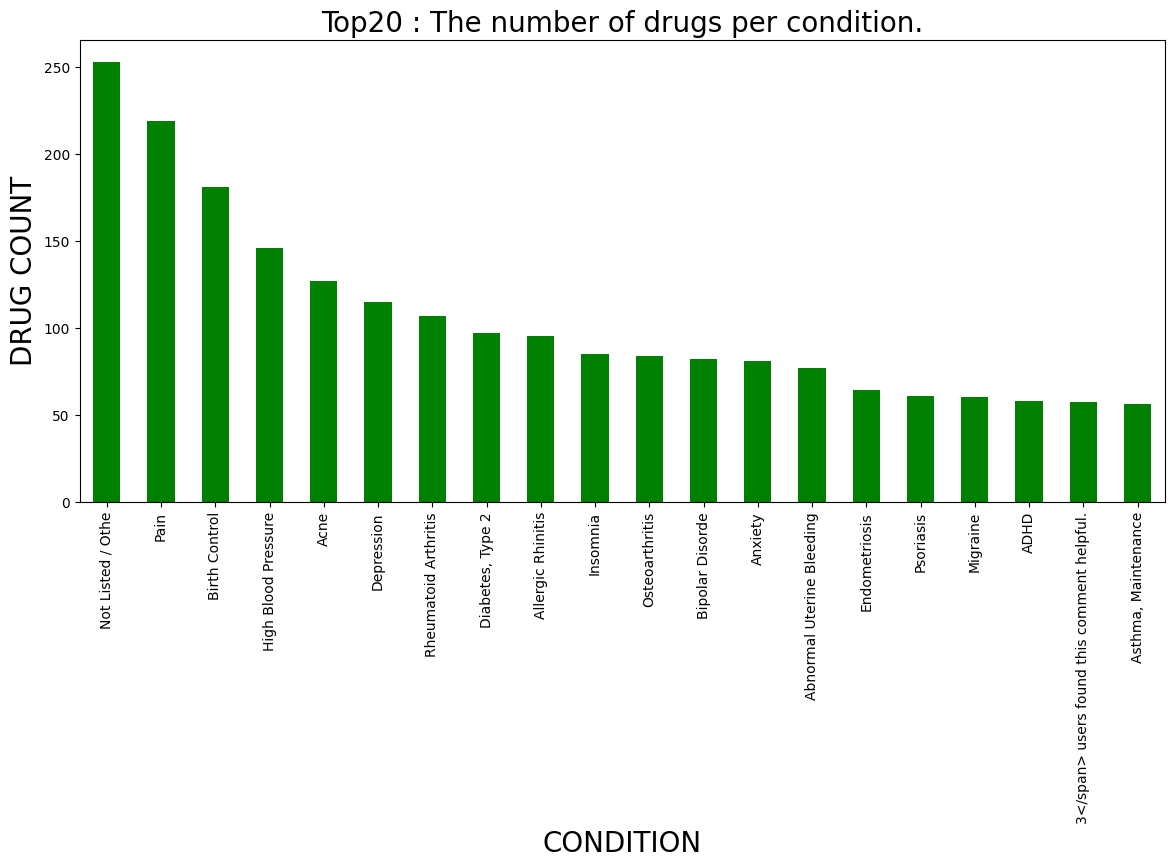

In [27]:
condition_dn = dfAll.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("CONDITION", fontsize = 20)
plt.ylabel("DRUG COUNT", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

#### Drop all rows where the CONDITION is not in the top 5
- SINCE THE AMOUNT OF DATA IS TOO LARGE, WE WILL ONLY USE THE TOP 5 CONDITIONS, AND DROP THE REST OF THE DATA

In [28]:
# Show all the conditions
dfAll['condition'].value_counts()

condition
Birth Control                                  38436
Depression                                     12164
Pain                                            8245
Anxiety                                         7812
Acne                                            7435
                                               ...  
unctional Gastric Disorde                          1
72</span> users found this comment helpful.        1
Hemangioma                                         1
Anti NMDA Receptor Encephalitis                    1
Pertussis Prophylaxis                              1
Name: count, Length: 909, dtype: int64

In [29]:
# Drop all rows not correponding to [Birth Control, Depresion, Pain, Anxiety and Acne]
dfAll = dfAll[dfAll['condition'].isin(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne'])]
# Sort by condition
dfAll = dfAll.sort_values(by=['condition'])
dfAll

,uniqueID,drugName,condition,review,rating,date,usefulCount
71707,81584,Yaz,Acne,"""I was on Yaz for about a year. It cleared up ...",9,18-Jun-10,6
30498,133641,Bactrim DS,Acne,"""Granddaughter in hospital thanks to this, eve...",1,15-Jul-17,0
20664,153092,Doxycycline,Acne,"""Well i was 15 when i started getting acne n i...",7,10-Jul-16,6
67231,16299,Ethinyl estradiol / norethindrone,Acne,"""I love gildess! I&#039;ve been on spironolact...",10,15-Apr-16,2
67198,63743,Epiduo,Acne,"""Had terrible acne on my chin and used this pr...",9,2009-Aug-12,11
...,...,...,...,...,...,...,...
89068,103319,Celecoxib,Pain,"""I have severe pain, stiffness, inflammation i...",10,14-Nov-17,0
31067,180419,Diclofenac,Pain,"""I have suffered from Rotator Cuff pain along ...",10,18-Apr-10,24
55446,193854,Hydrocodone,Pain,"""I&#039;m use to norco 10/325 and I take four ...",1,12-Jun-15,51
7832,34384,Tramadol,Pain,"""I was prescribed tramadol for my back pain. ...",2,2009-Mar-08,36


#### Unique ID Drop
- SINCE THE ID IS UNIQUE FOR EACH PATIENT, WE WILL DROP IT, THERE IS NO USE FOR IT

In [30]:
# Drop unique id
dfAll.drop(['uniqueID'], axis=1, inplace=True)
dfAll

,drugName,condition,review,rating,date,usefulCount
71707,Yaz,Acne,"""I was on Yaz for about a year. It cleared up ...",9,18-Jun-10,6
30498,Bactrim DS,Acne,"""Granddaughter in hospital thanks to this, eve...",1,15-Jul-17,0
20664,Doxycycline,Acne,"""Well i was 15 when i started getting acne n i...",7,10-Jul-16,6
67231,Ethinyl estradiol / norethindrone,Acne,"""I love gildess! I&#039;ve been on spironolact...",10,15-Apr-16,2
67198,Epiduo,Acne,"""Had terrible acne on my chin and used this pr...",9,2009-Aug-12,11
...,...,...,...,...,...,...
89068,Celecoxib,Pain,"""I have severe pain, stiffness, inflammation i...",10,14-Nov-17,0
31067,Diclofenac,Pain,"""I have suffered from Rotator Cuff pain along ...",10,18-Apr-10,24
55446,Hydrocodone,Pain,"""I&#039;m use to norco 10/325 and I take four ...",1,12-Jun-15,51
7832,Tramadol,Pain,"""I was prescribed tramadol for my back pain. ...",2,2009-Mar-08,36


#### Lowercase all the data

In [31]:
# Lowercase all text
dfAll['review'] = dfAll['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfAll['drugName'] = dfAll['drugName'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfAll['condition'] = dfAll['condition'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfAll

,drugName,condition,review,rating,date,usefulCount
71707,yaz,acne,"""i was on yaz for about a year. it cleared up ...",9,18-Jun-10,6
30498,bactrim ds,acne,"""granddaughter in hospital thanks to this, eve...",1,15-Jul-17,0
20664,doxycycline,acne,"""well i was 15 when i started getting acne n i...",7,10-Jul-16,6
67231,ethinyl estradiol / norethindrone,acne,"""i love gildess! i&#039;ve been on spironolact...",10,15-Apr-16,2
67198,epiduo,acne,"""had terrible acne on my chin and used this pr...",9,2009-Aug-12,11
...,...,...,...,...,...,...
89068,celecoxib,pain,"""i have severe pain, stiffness, inflammation i...",10,14-Nov-17,0
31067,diclofenac,pain,"""i have suffered from rotator cuff pain along ...",10,18-Apr-10,24
55446,hydrocodone,pain,"""i&#039;m use to norco 10/325 and i take four ...",1,12-Jun-15,51
7832,tramadol,pain,"""i was prescribed tramadol for my back pain. i...",2,2009-Mar-08,36


#### Getting Rating Visualization

Text(0.5, 1.0, 'The number of ratings per rating.')

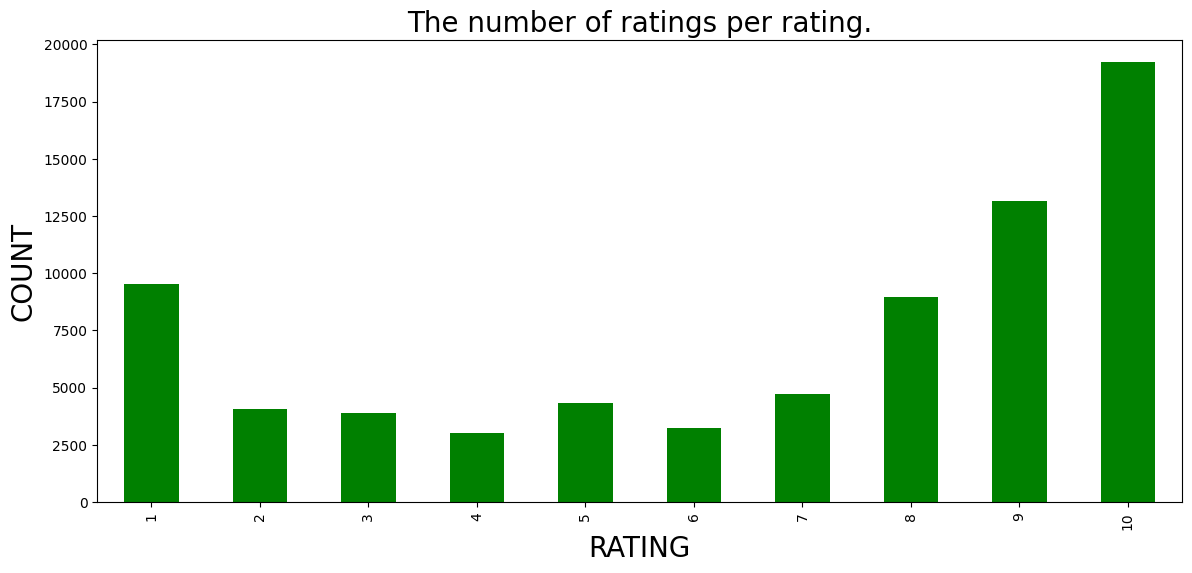

In [32]:
ratings = dfAll.groupby(['rating'])['rating'].count()
ratings.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("RATING", fontsize = 20)
plt.ylabel("COUNT", fontsize = 20)
plt.title("The number of ratings per rating.", fontsize = 20)

#### Label Encoding

In [33]:
# Label encoding for the condition
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfAll['condition'] = le.fit_transform(dfAll['condition'])
dfAll

,drugName,condition,review,rating,date,usefulCount
71707,yaz,0,"""i was on yaz for about a year. it cleared up ...",9,18-Jun-10,6
30498,bactrim ds,0,"""granddaughter in hospital thanks to this, eve...",1,15-Jul-17,0
20664,doxycycline,0,"""well i was 15 when i started getting acne n i...",7,10-Jul-16,6
67231,ethinyl estradiol / norethindrone,0,"""i love gildess! i&#039;ve been on spironolact...",10,15-Apr-16,2
67198,epiduo,0,"""had terrible acne on my chin and used this pr...",9,2009-Aug-12,11
...,...,...,...,...,...,...
89068,celecoxib,4,"""i have severe pain, stiffness, inflammation i...",10,14-Nov-17,0
31067,diclofenac,4,"""i have suffered from rotator cuff pain along ...",10,18-Apr-10,24
55446,hydrocodone,4,"""i&#039;m use to norco 10/325 and i take four ...",1,12-Jun-15,51
7832,tramadol,4,"""i was prescribed tramadol for my back pain. i...",2,2009-Mar-08,36


In [34]:
# print the unique values of the condition
print(dfAll['condition'].unique())

[0 1 2 3 4]


In [35]:
# Label encoding for the drugName
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfAll['drugName'] = le.fit_transform(dfAll['drugName'])
dfAll

,drugName,condition,review,rating,date,usefulCount
71707,630,0,"""i was on yaz for about a year. it cleared up ...",9,18-Jun-10,6
30498,73,0,"""granddaughter in hospital thanks to this, eve...",1,15-Jul-17,0
20664,179,0,"""well i was 15 when i started getting acne n i...",7,10-Jul-16,6
67231,208,0,"""i love gildess! i&#039;ve been on spironolact...",10,15-Apr-16,2
67198,196,0,"""had terrible acne on my chin and used this pr...",9,2009-Aug-12,11
...,...,...,...,...,...,...
89068,117,4,"""i have severe pain, stiffness, inflammation i...",10,14-Nov-17,0
31067,165,4,"""i have suffered from rotator cuff pain along ...",10,18-Apr-10,24
55446,246,4,"""i&#039;m use to norco 10/325 and i take four ...",1,12-Jun-15,51
7832,557,4,"""i was prescribed tramadol for my back pain. i...",2,2009-Mar-08,36


In [36]:
# print the unique values of the drugName
unique_drugName = dfAll['drugName'].unique()
#sort drugName
unique_drugName.sort()
print(unique_drugName)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

#### Dates Format

In [37]:
dfAll['date'] = pd.to_datetime(dfAll['date'])

##### The date will have more importance if is near to 2023

In [38]:
dfAll['year'] = dfAll['date'].dt.year
# Get the minimum year and maximum year
print("Minimum year: ", dfAll['year'].min())
print("Maximum year: ", dfAll['year'].max())

Minimum year:  2001
Maximum year:  2017


In [39]:
# Knowing that the maximum year is 2017 and minimum is 2001, then give a rate from 0 to 1
# For each year
dfAll['year_importance'] = (dfAll['year'] - 2001) / (2017 - 2001)
dfAll

,drugName,condition,review,rating,date,usefulCount,year,year_importance
71707,630,0,"""i was on yaz for about a year. it cleared up ...",9,2010-06-18,6,2010,0.5625
30498,73,0,"""granddaughter in hospital thanks to this, eve...",1,2017-07-15,0,2017,1.0000
20664,179,0,"""well i was 15 when i started getting acne n i...",7,2016-07-10,6,2016,0.9375
67231,208,0,"""i love gildess! i&#039;ve been on spironolact...",10,2016-04-15,2,2016,0.9375
67198,196,0,"""had terrible acne on my chin and used this pr...",9,2009-08-12,11,2009,0.5000
...,...,...,...,...,...,...,...,...
89068,117,4,"""i have severe pain, stiffness, inflammation i...",10,2017-11-14,0,2017,1.0000
31067,165,4,"""i have suffered from rotator cuff pain along ...",10,2010-04-18,24,2010,0.5625
55446,246,4,"""i&#039;m use to norco 10/325 and i take four ...",1,2015-06-12,51,2015,0.8750
7832,557,4,"""i was prescribed tramadol for my back pain. i...",2,2009-03-08,36,2009,0.5000


#### Reviews

#### Sentiment Analysis
- WE NEED TO MAKE A SENTIMENT ANALYSIS OF THE REVIEWS, TO ATTACK THE PROBLEM WE NEED TO KNOW IF THE REVIEW IS POSITIVE, NEUTRAL OR NEGATIVE
- AFTER A RESEARCH WE FOUND THAT THIS IS A GREAT WAY TO USE THE REVIEWS FURTHER IN THE ANALYSIS AND MODEL TRAINING

##### Making a Sentiment using each review rating
- WE ENCOUNTERD THAT IT IS BEST TO USE A PRE TRAINED MODEL TO MAKE THE SENTIMENT ANALYSIS

In [40]:
save = False # IF THE SENTIMENT ANALYSIS LIBRARY IS NOT INSTALLED, SET THIS TO FALSE
sentimentAnalysisFinished = True # SI QUIEREN CORRER TODO EL MODELO DE SENTIMENT ANALYSIS, SETEAR ESTO A FALSE, NO LES RECOMIENDO

In [41]:
# For the sentiment analysis we are using a HuggingFace free model
if not save:
    # Preprocess text (username and link placeholders)
    def preprocess(text):
        new_text = []
    
    
        for t in text.split(" "):
            t = '@user' if t.startswith('@') and len(t) > 1 else t
            t = 'http' if t.startswith('http') else t
            new_text.append(t)
        return " ".join(new_text)

    # Tasks:
    # emoji, emotion, hate, irony, offensive, sentiment
    # stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

    task='sentiment'
    MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

    tokenizer = AutoTokenizer.from_pretrained(MODEL)



    # download label mapping
    labels=[]
    mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_link) as f:
        html = f.read().decode('utf-8').split("\n")
        csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

    # # TF
    model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

    # PRUEBA DE SENTIMIENTO
    text = "Good night 😊"
    encoded_input = tokenizer(text, return_tensors='tf')
    output = model(encoded_input)
    scores = output[0][0].numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        print(f"{i+1}) {l} {np.round(float(s), 4)}")

    saved = True


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


1) positive 0.8466
2) neutral 0.1458
3) negative 0.0076


In [42]:
# use the sentiment analysis model to predict the sentiment of each review
def sentiment_score(text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

In [43]:
# USING THE NOT REVIEW CLEAN
if not sentimentAnalysisFinished:
    # ALSO PRINT THE NUMBER OF REVIEW WHILE APLYING THE SENTIMENT ANALYSIS
    dfAll['sentiment_notClean'] = dfAll['review'].apply(sentiment_score)
    dfAll['sentiment_notClean'] = dfAll['sentiment_notClean'].apply(lambda x : 1 if np.argmax(x)==2 else -1 if np.argmax(x)==0 else 0)
    # save de df to a csv file
    dfAll.to_csv('dfAll_NotCleanReview.csv', index=False)
sentimentAnalysisFinished = True

In [44]:
dfAll

,drugName,condition,review,rating,date,usefulCount,year,year_importance
71707,630,0,"""i was on yaz for about a year. it cleared up ...",9,2010-06-18,6,2010,0.5625
30498,73,0,"""granddaughter in hospital thanks to this, eve...",1,2017-07-15,0,2017,1.0000
20664,179,0,"""well i was 15 when i started getting acne n i...",7,2016-07-10,6,2016,0.9375
67231,208,0,"""i love gildess! i&#039;ve been on spironolact...",10,2016-04-15,2,2016,0.9375
67198,196,0,"""had terrible acne on my chin and used this pr...",9,2009-08-12,11,2009,0.5000
...,...,...,...,...,...,...,...,...
89068,117,4,"""i have severe pain, stiffness, inflammation i...",10,2017-11-14,0,2017,1.0000
31067,165,4,"""i have suffered from rotator cuff pain along ...",10,2010-04-18,24,2010,0.5625
55446,246,4,"""i&#039;m use to norco 10/325 and i take four ...",1,2015-06-12,51,2015,0.8750
7832,557,4,"""i was prescribed tramadol for my back pain. i...",2,2009-03-08,36,2009,0.5000


In [45]:
#load the df from the csv file
df = pd.read_csv('dfAll_NotCleanReview.csv')
#Drop "review_clean"
df.drop(['review_clean'], axis=1, inplace=True)
#Drop "review"
df.drop(['review'], axis=1, inplace=True)
#Drop 'date'
df.drop(['date'], axis=1, inplace=True)
# from dfAll get the year_importance and put it in df
df['year_importance'] = dfAll.reset_index(drop=True)['year_importance']
# change the name of the column sentimetn_notClean to sentiment
df.rename(columns={'sentiment_notClean': 'sentiment'}, inplace=True)
df


,drugName,condition,rating,usefulCount,sentiment,year_importance
0,179,0,8,18,1,0.5625
1,263,0,8,2,1,1.0000
2,196,0,10,34,1,0.9375
3,196,0,8,11,-1,0.9375
4,196,0,9,4,1,0.5000
...,...,...,...,...,...,...
74087,473,4,7,26,1,1.0000
74088,248,4,9,21,1,0.5625
74089,423,4,8,9,1,0.8750
74090,346,4,10,3,0,0.5000


# DESDE AQUI VIENE SU PARTE 
- RECUERDEN QUE DE DONDE SACAN LOS DATOS ES DEL DATAFRAME df
- LOS FEATURES QUE ENTRAN AL MODELO SON ['CONDITION','RATING','USEFULCOUNT','SENTIMENT' ,'YEAR_IMPORTANCE'] Y EL MODELO PREDICE ['DRUGNAME']

#### Feature Selection
- JOSUE
- EN INTERNET HYA FORMAS DE GRAFICAR LOS FEATURES, PARA VER CUALES SON LOS MAS IMPORTANTES, CON QUE HAGAS LAS GRAFICAS DE FEATURES YA ESTA
- TAMBIEN PUEDES GRAFICAR LOS CORRELATION MATRIX QUE DIO EN CLASES USANDO PANDAS O MATPLOTLIB

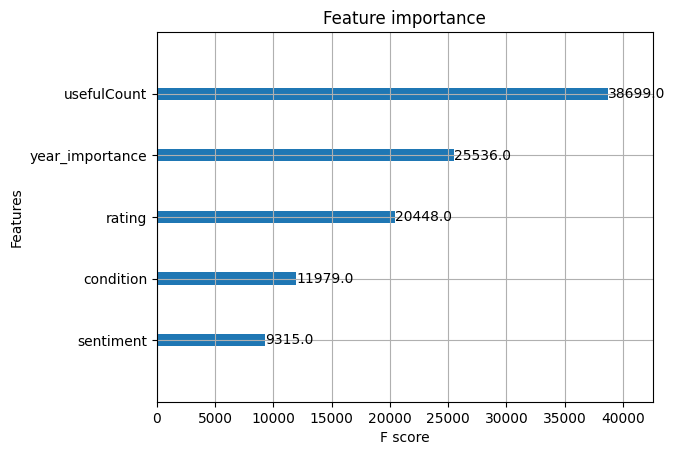

In [53]:
# Separate the data into characteristics and objective variable
X = df[['condition', 'rating', 'usefulCount', 'sentiment','year_importance']]
y = df['drugName']

# Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X, y)

# Graph the most important features
xgb.plot_importance(model)
plt.show()


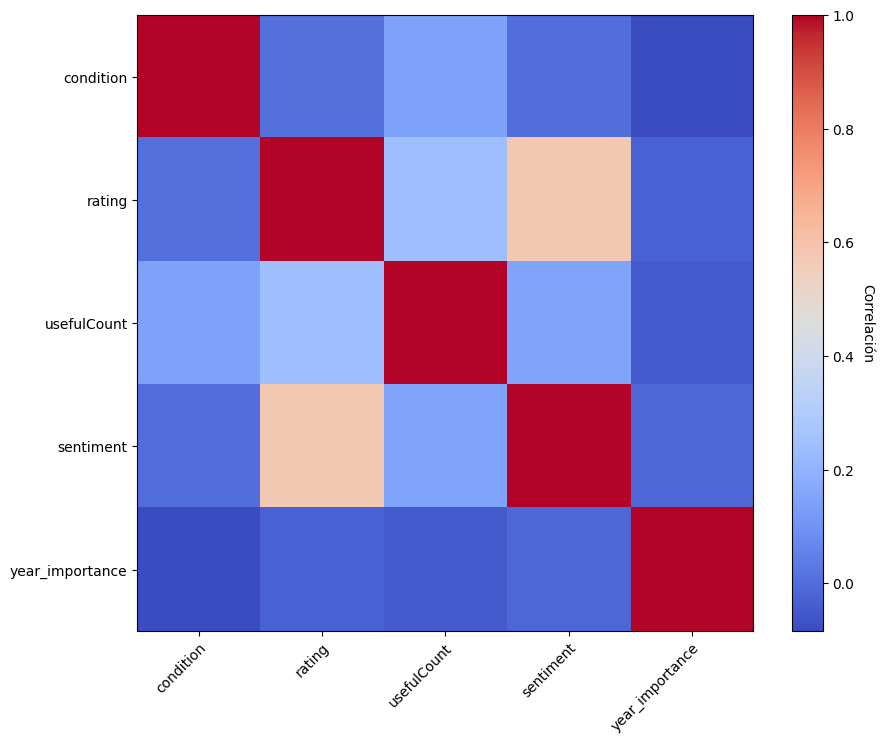

In [54]:
# Select only the feature columns
features = ['condition', 'rating', 'usefulCount', 'sentiment','year_importance']
X = df[features]

# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_matrix, cmap='coolwarm')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlación', rotation=-90, va="bottom")
plt.show()

#### MODEL TRAINING
- RANDALL
- ELEGIR EL MODELO, RECOMENDADO LOGISTIC REGRESION DE LO QEU HE VISTO EN INTERNET O UN NEURAL NETWORK
- HAY QUE USAR ESOS PIPELINES QUE ESTAN EN EL D2L


In [60]:
#
x_training = dfAll[['condition', 'rating', 'usefulCount', 'year_importance']]
y_training = dfAll[['drugName']]
x_test = dfAll[['condition', 'rating', 'usefulCount', 'year_importance']]
y_test = dfAll[['drugName']]



### Logistic Regression
Justification: Given that the model expects to recommend a medicine based on a given condition/syntoms



In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lambdav = 0.1
logreg = LogisticRegression(penalty="l2", C=1/lambdav , max_iter=1000)
logreg.fit(x_training, y_training)
y_pred = logreg.predict(x_test)

### Neural Network
Justification: Given that the model expects to recommend a medicine based on a given condition/syntoms, a neural netwrok would be best to recomend a medicine based on a given amount of features



In [67]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_training, y_training, epochs=150, batch_size=10)
_, accuracy = model.evaluate(x_training, y_training)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/150
7410/7410 [==============================] - 5s 626us/step - loss: -4058.2295 - accuracy: 0.0022
Epoch 2/150
7410/7410 [==============================] - 5s 618us/step - loss: -4517.4263 - accuracy: 0.0020
Epoch 3/150
7410/7410 [==============================] - 5s 728us/step - loss: -4519.0747 - accuracy: 0.0019
Epoch 4/150
7410/7410 [==============================] - 6s 870us/step - loss: -4519.3101 - accuracy: 0.0019
Epoch 5/150
7410/7410 [==============================] - 6s 852us/step - loss: -4519.3354 - accuracy: 0.0019
Epoch 6/150
7410/7410 [==============================] - 8s 1ms/step - loss: -4519.3276 - accuracy: 0.0019
Epoch 7/150
7410/7410 [==============================] - 7s 967us/step - loss: -4519.3384 - accuracy: 0.0019
Epoch 8/150
7410/7410 [==============================] - 7s 964us/step - loss: -4519.3135 - accuracy: 0.0019
Epoch 9/150
7410/7410 [==============================] - 7s 1ms/step - loss: -4519.3291 - accuracy: 0.0019
Epoch 10/150
7410/7410 

#### VALIDATION
- JOSUE
- DEBERAS CREAR x_train, x_val, x_test, y_train, y_val, y_test
- HAY QUE USAR K FOLD CROSS VALIDATION ESO ESTA EN EL D2L

In [68]:
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import wilcoxon


# Crear función para evaluación
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# Obtener resultados de los modelos
lr_results = evaluate_model(logreg, X, y)
nn_results = evaluate_model(model, X, y)

# Comparar modelos usando wilcoxon
_, p = wilcoxon(lr_results, nn_results)

# Reportar resultado del test de hipótesis
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (No hay diferencia significativa)')
else:
    print('Se rechaza la hipótesis nula (Hay diferencia significativa)')

#### MODEL TESTING
- RANDALL
- MUESTRA LOS RESULTADOS DEL MODELO Y LAS METRICAS COMO EL LOSS, ACCURACY, ETC

#### CONCLUSIONES
- ESTA PARTE LA DEJAMOS PARA LA ENTREGA FINAL